In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv('wine_data.csv', header=None, usecols=[0,1,2])
df.columns=['class label', 'Alcohol', 'Malic Acid']

In [5]:
df

class label  Alcohol  Malic Acid
0              1    14.23        1.71
1              1    13.20        1.78
2              1    13.16        2.36
3              1    14.37        1.95
4              1    13.24        2.59
..           ...      ...         ...
173            3    13.71        5.65
174            3    13.40        3.91
175            3    13.27        4.28
176            3    13.17        2.59
177            3    14.13        4.10

[178 rows x 3 columns]

In [6]:
sns.kdeplot(df['Alcohol'])

<AxesSubplot:xlabel='Alcohol', ylabel='Density'>

In [7]:
sns.kdeplot(df['Malic Acid'])

<AxesSubplot:xlabel='Malic Acid', ylabel='Density'>

<AxesSubplot:xlabel='Alcohol', ylabel='Malic Acid'>

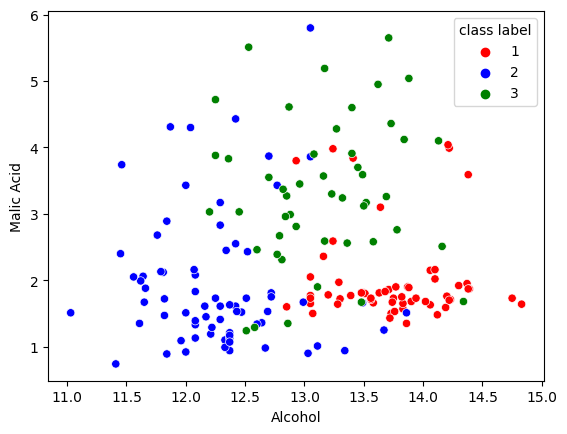

In [13]:
color_dict={1: 'red', 2:'blue', 3:'green'}
sns.scatterplot(x='Alcohol', y='Malic Acid', data=df, hue='class label', palette=color_dict)

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop('class label', axis=1),
                                                   df['class label'], test_size=0.3,
                                                   random_state=0)
x_train.shape, x_test.shape

((124, 2), (54, 2))

In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

scaler.fit(x_train)

x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [20]:
x_train_scaled= pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled= pd.DataFrame(x_test_scaled, columns=x_test.columns)


In [21]:
x_train_scaled

Alcohol  Malic Acid
0    0.720430    0.203782
1    0.319892    0.084034
2    0.602151    0.712185
3    0.572581    0.563025
4    0.760753    0.130252
..        ...         ...
119  0.212366    0.174370
120  0.360215    0.058824
121  0.373656    0.151261
122  0.771505    0.165966
123  0.841398    0.340336

[124 rows x 2 columns]

In [22]:
x_test_scaled

Alcohol  Malic Acid
0   0.728495    0.163866
1   0.473118    0.373950
2   0.360215    0.050420
3   0.680108    0.176471
4   0.543011    1.031513
5   0.142473    0.243697
6   0.814516    0.264706
7   0.357527    0.617647
8   0.327957    0.176471
9   0.282258    0.197479
10  0.626344    0.350840
11  0.766129    0.871849
12  0.852151    0.182773
13  0.360215    0.037815
14  0.685484    0.355042
15  0.260753    0.006303
16  0.733871    0.134454
17  0.849462    0.147059
18  0.432796    0.098739
19  0.752688    0.159664
20  0.559140    0.025210
21  0.543011    0.159664
22  0.594086    0.357143
23  0.397849    0.176471
24  0.349462    0.044118
25  0.400538    0.323529
26  0.376344    0.134454
27  0.303763    0.151261
28  0.196237    0.376050
29  0.739247    0.392857
30  0.634409    0.184874
31  0.857527    0.170168
32  0.271505    0.716387
33  0.854839    0.661765
34  1.021505    0.157563
35  0.543011    0.184874
36  0.715054    0.497899
37  0.446237    0.134454
38  0.158602    0.231092
39  0.637097    0.634454
40  0.663978    0.193277
41  0.725806    0.128151
42  0.338710    0.407563
43  0.422043    0.094538
44  0.102151   -0.031513
45  0.701613    0.464286
46  0.422043    0.329832
47  0.250000    0.042017
48  0.327957    0.628151
49  0.879032    0.216387
50  0.497312    0.441176
51  0.661290    0.567227
52  0.680108    0.172269
53  0.889785    0.165966

In [25]:
np.round(x_train.describe(),1)

Alcohol  Malic Acid
count    124.0       124.0
mean      13.0         2.4
std        0.8         1.1
min       11.0         0.9
25%       12.4         1.6
50%       13.0         1.9
75%       13.6         3.2
max       14.8         5.6

In [26]:
np.round(x_train_scaled.describe(),1)

Alcohol  Malic Acid
count    124.0       124.0
mean       0.5         0.3
std        0.2         0.2
min        0.0         0.0
25%        0.4         0.2
50%        0.5         0.2
75%        0.7         0.5
max        1.0         1.0

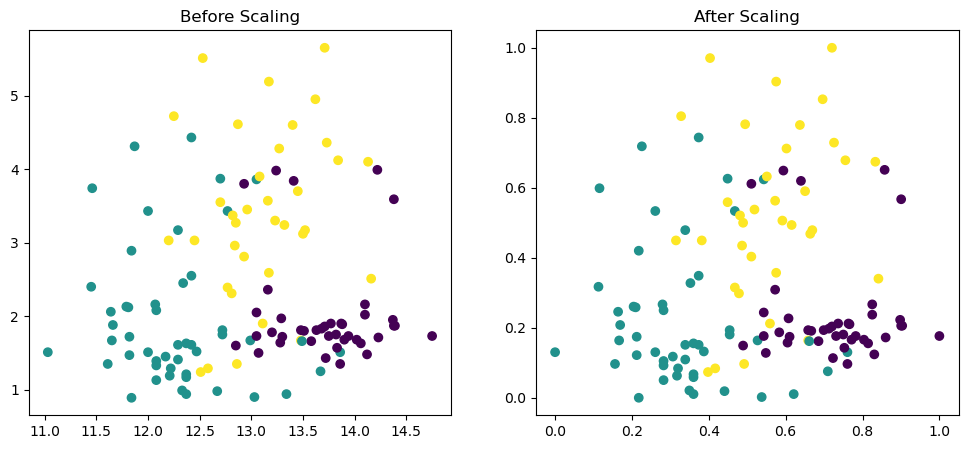

In [31]:
fig, (ax1, ax2)= plt.subplots(ncols=2, figsize=(12,5))

ax1.set_title("Before Scaling")
ax1.scatter(x='Alcohol', y='Malic Acid', data=x_train, c=y_train)
ax2.set_title("After Scaling")
ax2.scatter(x='Alcohol', y='Malic Acid', data=x_train_scaled, c=y_train)

<AxesSubplot:title={'center':'After Scaling'}, xlabel='Alcohol', ylabel='Density'>

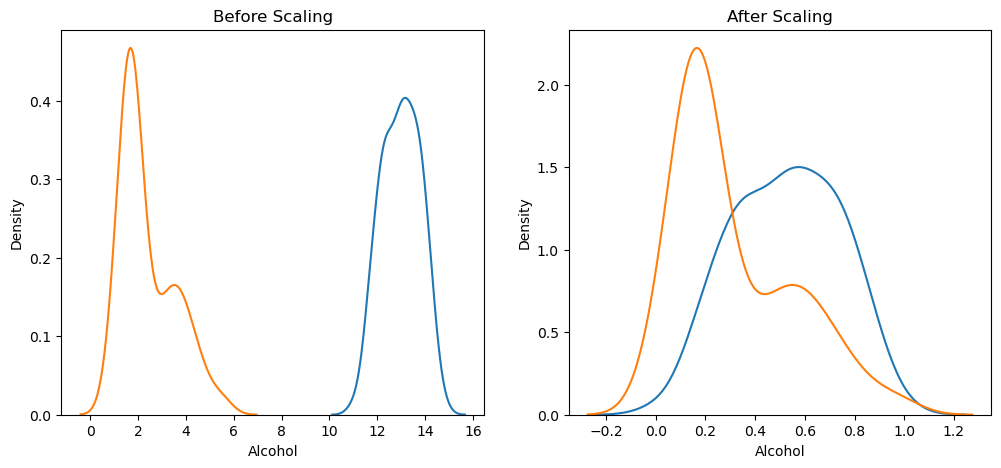

In [32]:
fig, (ax1, ax2)= plt.subplots(ncols=2, figsize=(12,5))

ax1.set_title("Before Scaling")
sns.kdeplot(x_train['Alcohol'], ax=ax1)
sns.kdeplot(x_train['Malic Acid'], ax=ax1)

ax2.set_title("After Scaling")
sns.kdeplot(x_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(x_train_scaled['Malic Acid'], ax=ax2)

<AxesSubplot:title={'center':'Alcohol Distrbution After Scaling'}, xlabel='Alcohol', ylabel='Density'>

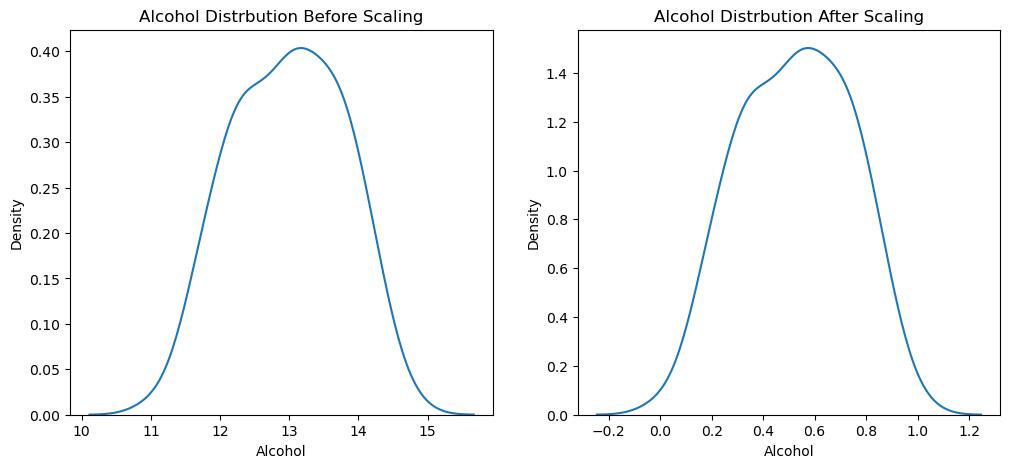

In [33]:
fig, (ax1, ax2)= plt.subplots(ncols=2, figsize=(12,5))

ax1.set_title("Alcohol Distrbution Before Scaling")
sns.kdeplot(x_train['Alcohol'], ax=ax1)


ax2.set_title("Alcohol Distrbution After Scaling")
sns.kdeplot(x_train_scaled['Alcohol'], ax=ax2)


In [34]:
fig, (ax1, ax2)= plt.subplots(ncols=2, figsize=(12,5))

ax1.set_title("Alcohol Distrbution Before Scaling")
sns.kdeplot(x_train['Malic Acid'], ax=ax1)

ax2.set_title("Alcohol Distrbution After Scaling")
sns.kdeplot(x_train_scaled['Malic Acid'], ax=ax2)

<AxesSubplot:title={'center':'Alcohol Distrbution After Scaling'}, xlabel='Malic Acid', ylabel='Density'>